<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> MÔ TẢ:</h1> 

<ul>
<li><p style="font-family:verdana;">
Trong notebook, dự đoán thu nhập của một người là trên 50k hay dưới 50k  bằng cách sử dụng nhiều đặc điểm khác nhau như tuổi tác, trình độ học vấn và nghề nghiệp.
</p></li>
    
<li><p style="font-family:verdana;">
Tập dữ liệu sắp sử dụng là tập dữ liệu về thu nhập điều tra dân số dành cho người lớn từ Kaggle, chứa khoảng 32561 dòng và 15 trường(cột) có thể tải xuống tại <a href="https://www.kaggle.com/uciml/adult-census-income">đây</a>.
</p></li> 

<li><p style="font-family:verdana;">
Tập dữ liệu chứa các nhãn mà chúng ta phải dự đoán và các nhãn là rời rạc và nhị phân. Vì vậy, vấn đề gặp phải là loại Phân loại được giám sát.
</p></li>  
</ul>
 


</div>

<div class="alert alert-block alert-info">
<h2 style="font-family:verdana;"> Trường:</h2>
    
- age             : tuổi của công dân
- workclass       : việc làm của công dân
- fnlwgt          : final weight của công dân
- education       : trình độ học vấn của công dân 
- education.num   : số năm học tập của công dân
- marital.status  : tình trạng hôn nhân
- occupation      : nghề nghiệp của một công dân
- relationship    : mối quan hệ hoặc vai trò trong gia đình 
- race            : chủng tộc của công dân
- sex             : giới tính của công dân
- capital.gain    : Lợi nhuận ngắn hạn đến từ thu nhập bạn sở hữu trong một năm hoặc ít hơn.
- capital.loss    : Lợi nhuận ngắn hạn đến từ thu nhập bạn đã mất trong một năm hoặc ít hơn.
- hours.per.week  : số giờ làm việc trong một tuần
- native.country  : quốc tịch gốc 
    
Mục tiêu :
  - thu nhập : <=50k hoặc >50k trên năm.
    
Loại bài toán : Phân loại.
    
Giá trị kinh doanh : Hiểu rõ mức sống của một khu vực.
</div>

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> XÁC ĐỊNH CÁC BƯỚC THỰC HIỆN:</h3>    
 
### 1, Tìm hiểu dữ liệu
- Trường(cột)
- Target
- phân loại hoặc dự đoán (classification or regression)

### 2, Phân tích Trường(cột)
- Phân tích khám phá dữ liệu (exploratory data analysis)

### 3, Xử lý dữ liệu
    
##### Kiểm tra, xử lý:
- Giá trị bất thường
- Giá trị ngoại lai, nhiễu (outlier(noise) values)
- Không nhất quán (inconsistent)
- Mã hóa (label encoding)
- Phân vùng dữ liệu     
- Mất Cân bằng (imbalanced)
    
### 4, Xây dựng mô hình

### 5, Đánh giá mô hình

### 6, Điều chỉnh tham số

### 7, Lưu mô hình

</div>

#### Bước 1.Tìm hiểu dữ liệu:

In [1]:
# Trường(cột) ? Target? Phân loại hoặc hồi quy (classification or regression).

In [2]:
# Khai báo thư viện.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Đọc dữ liệu

dataset = pd.read_csv(r"D:\Thuc tap\Data\AI Specialist Lesson 09\adult.csv")
display(dataset.sample(10))
dataset.shape

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
26266,33,Private,178429,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
26823,34,Private,148226,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,48,United-States,<=50K
2849,43,Private,152958,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,40,United-States,>50K
4824,23,Local-gov,430828,Some-college,10,Separated,Exec-managerial,Unmarried,Black,Male,0,0,40,United-States,<=50K
27289,31,Private,309620,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,6,South,<=50K
25125,37,Private,112271,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
6879,72,?,113044,HS-grad,9,Widowed,?,Not-in-family,White,Male,0,0,30,United-States,<=50K
17338,32,Private,309513,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
3718,38,Self-emp-not-inc,146042,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,3103,0,60,United-States,>50K
17444,44,Self-emp-not-inc,156687,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,0,42,Japan,<=50K


(32561, 15)

In [4]:
# thống kê tóm tắt

display(dataset.describe(include = 'all').T)
print('\n')
print(dataset.info(),'\n')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education.num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital.status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None 



In [5]:
print('Trường có giá trị định lượng:', list(dataset.describe().columns))
print('Trường có giá trị định tính:', list(dataset.describe(include = 'O').columns))

Trường có giá trị định lượng: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Trường có giá trị định tính: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


##### ===> Mục tiêu :
- thu nhập : <=50k hoặc >50k trên năm, thuộc Trường income

##### ===> Loại bài toán : Phân loại (classification).

###  2, Phân tích Trường(cột)

####  Phân tích đơn biến

_____ Trường workclass ____________________________________________________________________________________________________


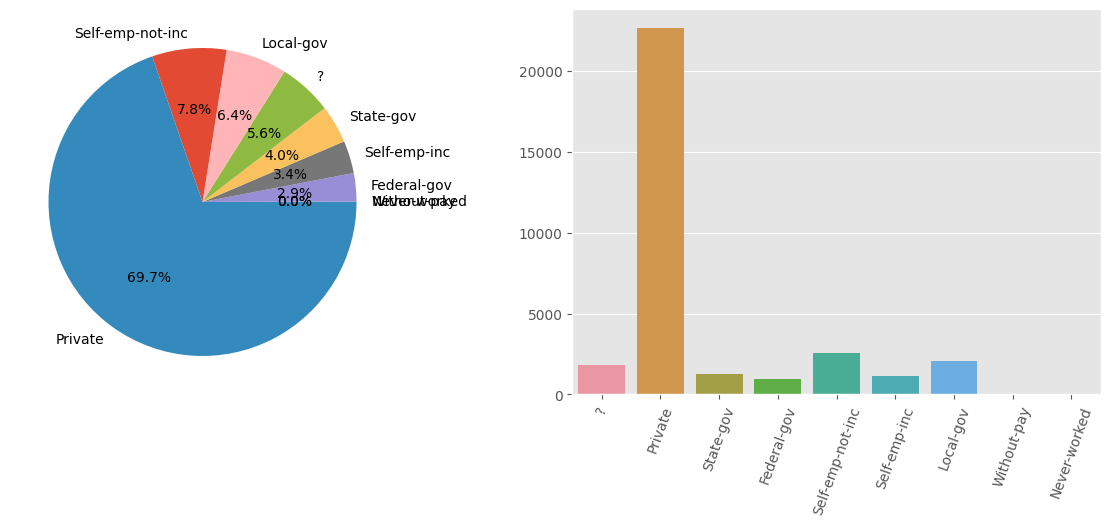

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 


_____ Trường education ____________________________________________________________________________________________________


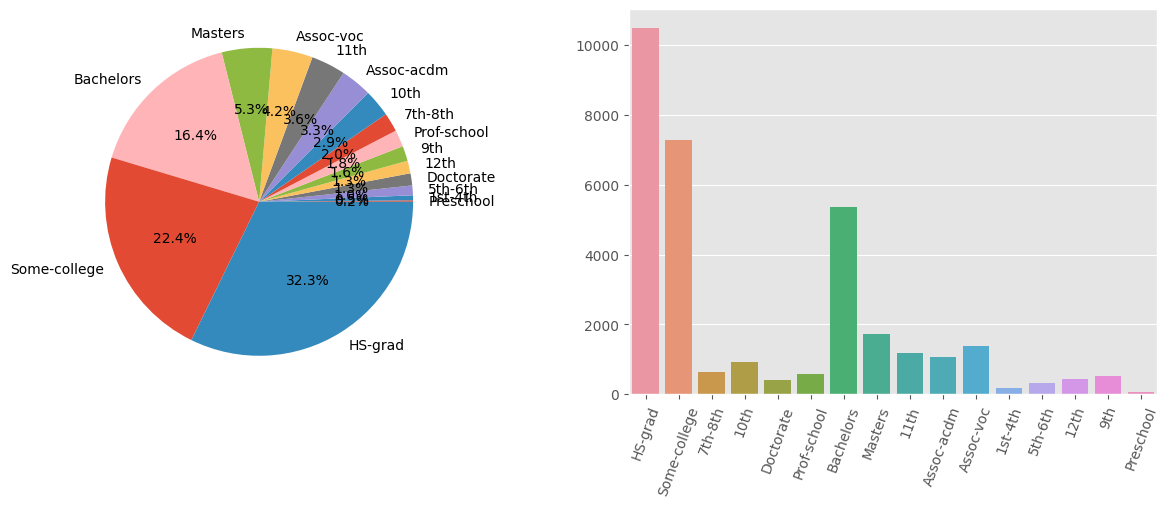

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 


_____ Trường marital.status ____________________________________________________________________________________________________


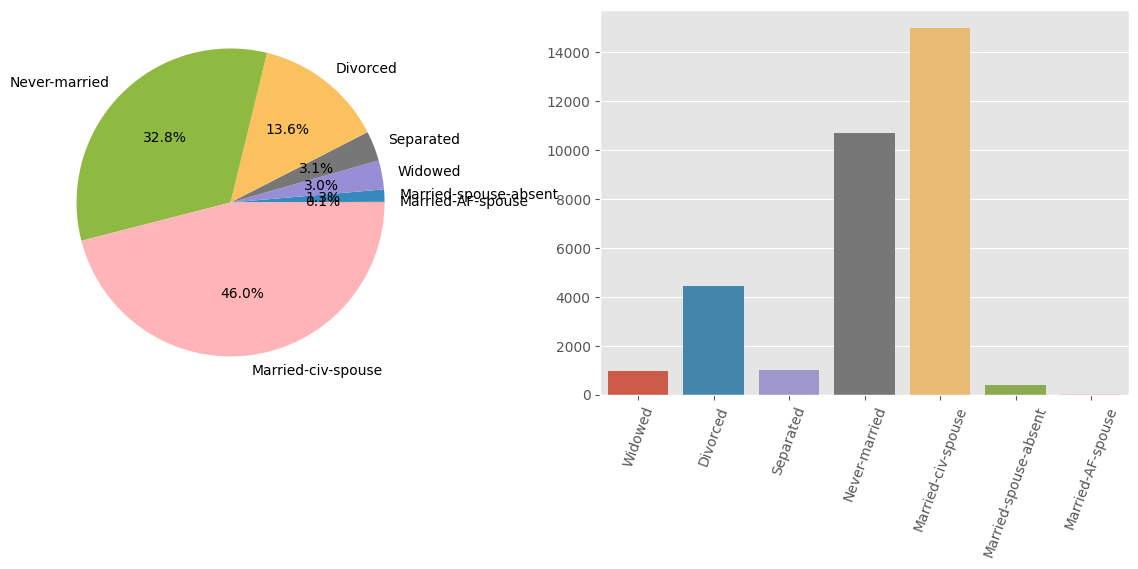

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64 


_____ Trường occupation ____________________________________________________________________________________________________


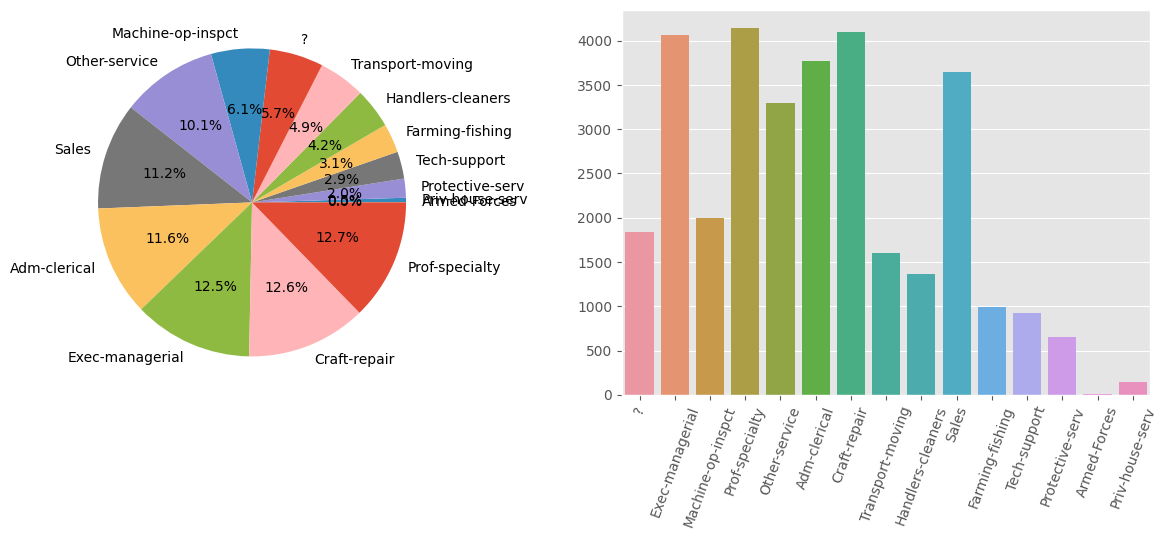

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64 


_____ Trường relationship ____________________________________________________________________________________________________


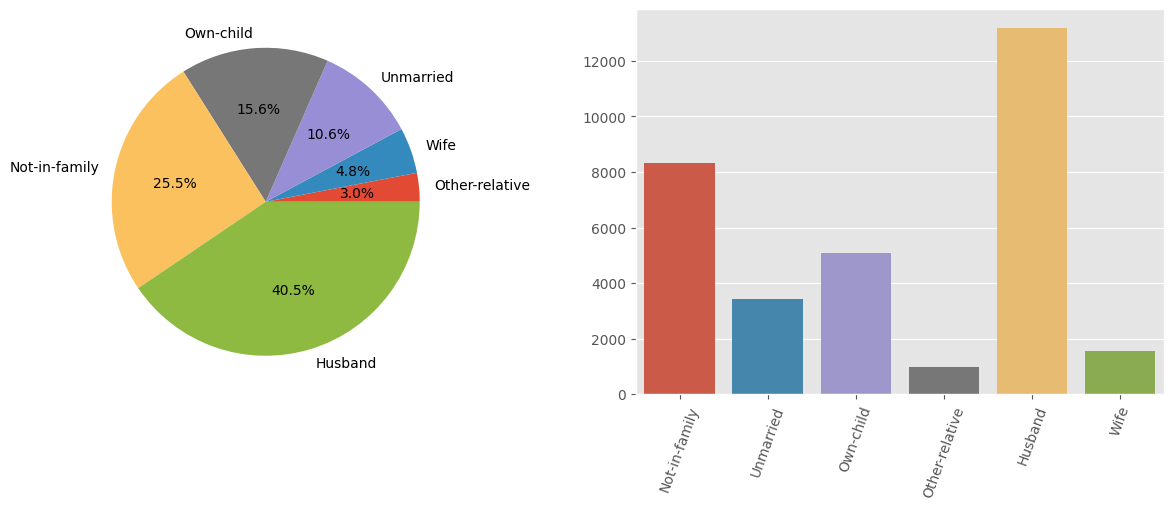

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64 


_____ Trường race ____________________________________________________________________________________________________


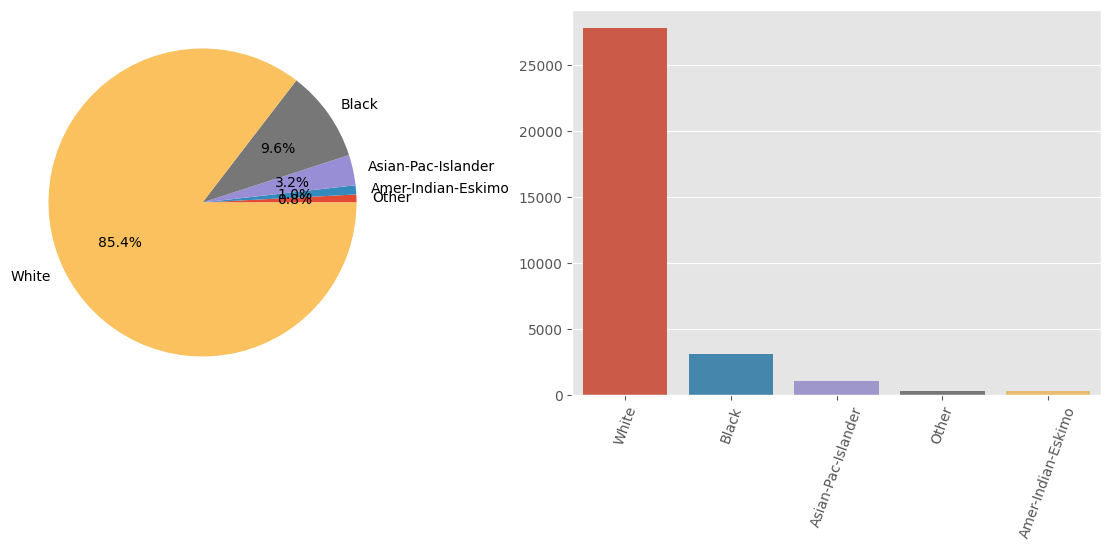

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64 


_____ Trường sex ____________________________________________________________________________________________________


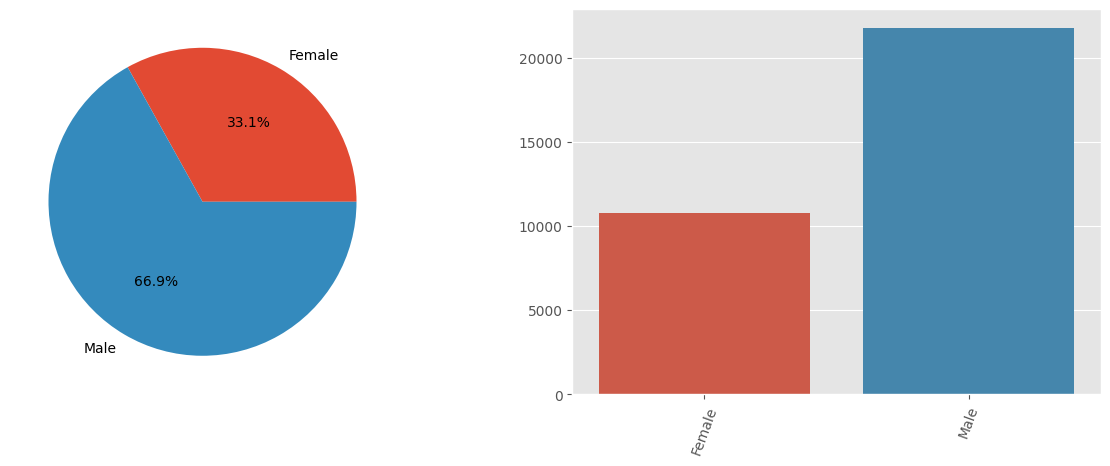

Male      21790
Female    10771
Name: sex, dtype: int64 


_____ Trường native.country ____________________________________________________________________________________________________


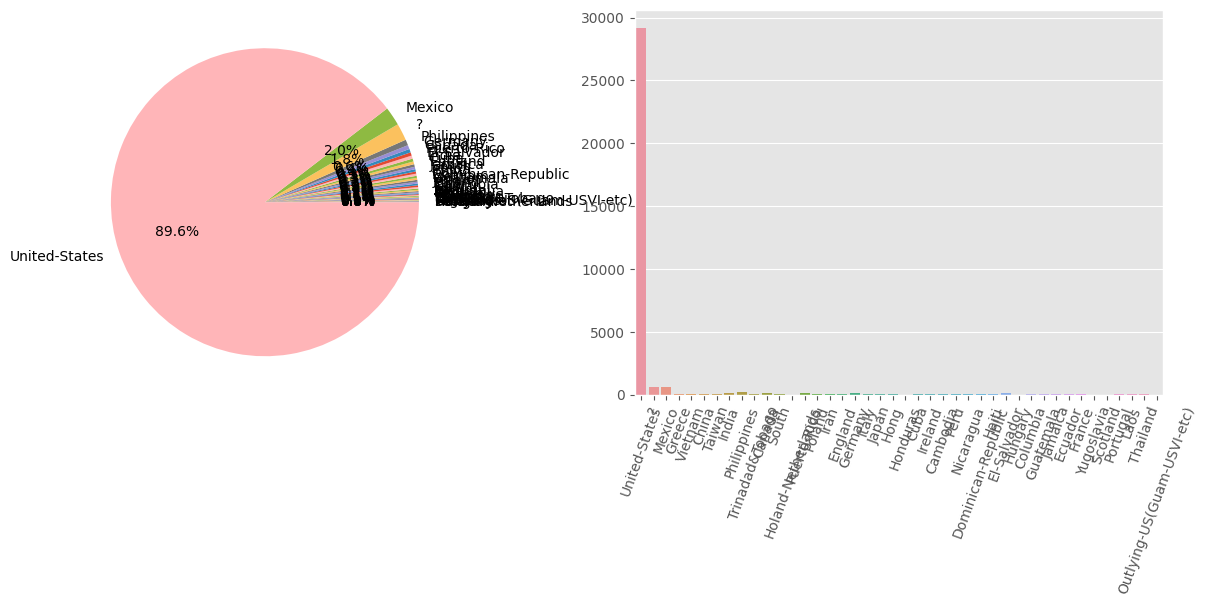

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

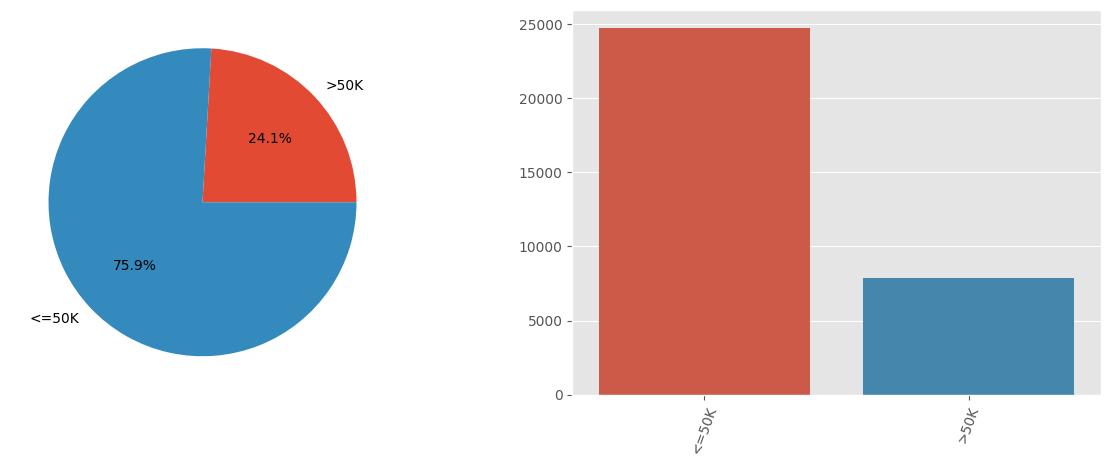

<=50K    24720
>50K      7841
Name: income, dtype: int64 




In [6]:
# categorical features nên sử dụng những loại biểu đồ như: bar chart (so sánh), pie (tỉ lệ phần trăm)

categorical = dataset.describe(include = 'O').columns

for i in dataset[categorical]:
    print('_' * 5, 'Trường', i, '_' * 100)
    plt.style.use('ggplot')
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    dataset[i].value_counts().sort_values().plot.pie(autopct='%1.1f%%')
    plt.title(None)
    plt.xlabel(None)
    plt.ylabel(None)
    
    plt.subplot(1,2,2)
    sns.countplot(x = dataset[i])
    plt.xticks(rotation = 70)
    plt.title(None)
    plt.xlabel(None)
    plt.ylabel(None)
    
    plt.show()
    print(dataset[i].value_counts(), '\n' * 2 )
    

_____ capital.gain ____________________________________________________________________________________________________ 




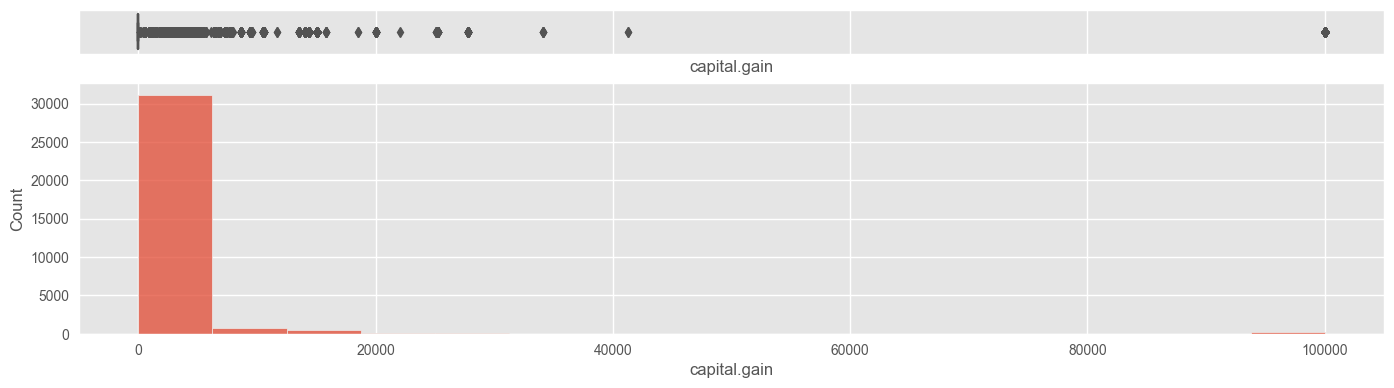

_____ education.num ____________________________________________________________________________________________________ 




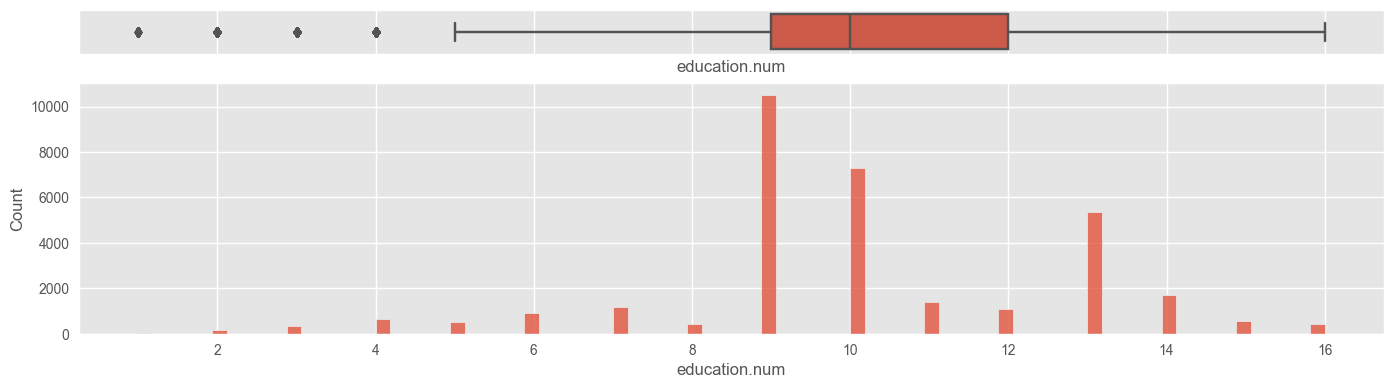

_____ fnlwgt ____________________________________________________________________________________________________ 




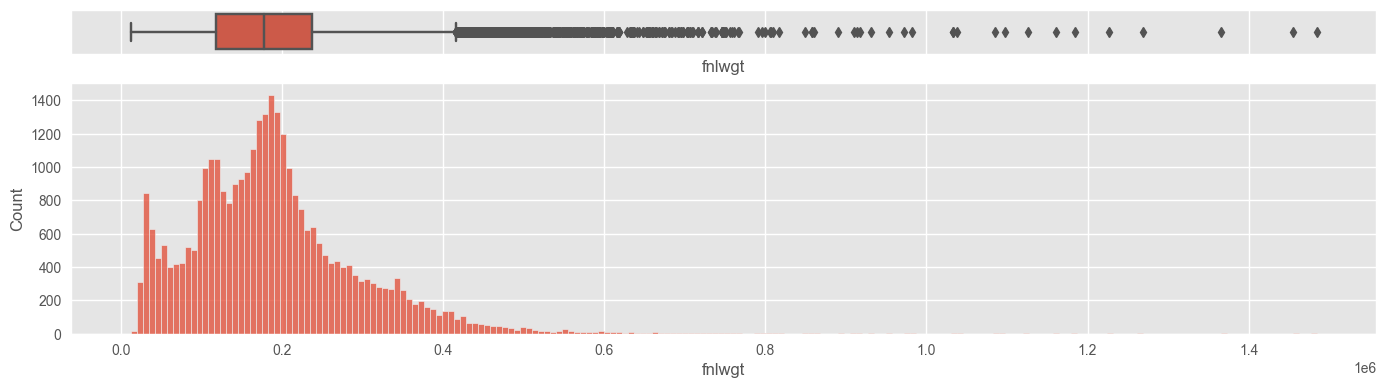

_____ age ____________________________________________________________________________________________________ 




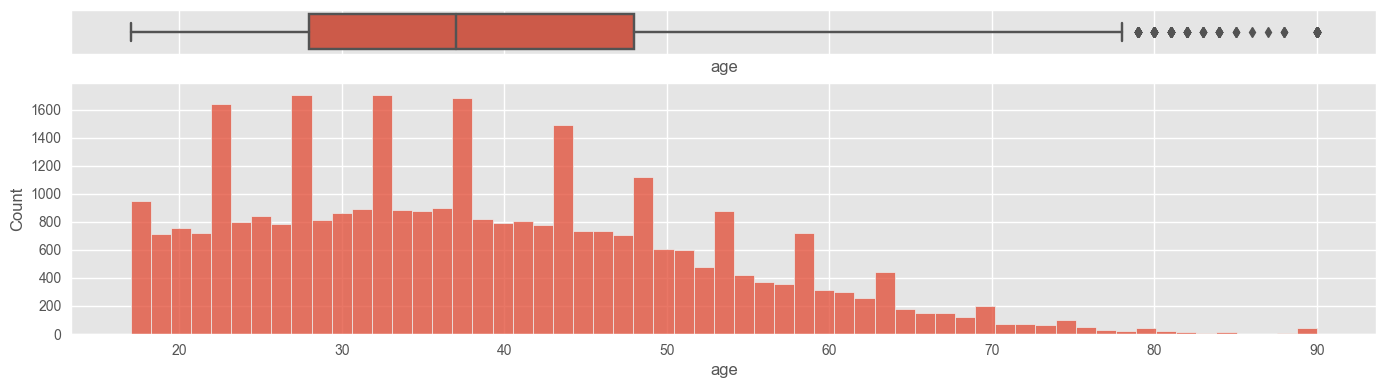

_____ capital.loss ____________________________________________________________________________________________________ 




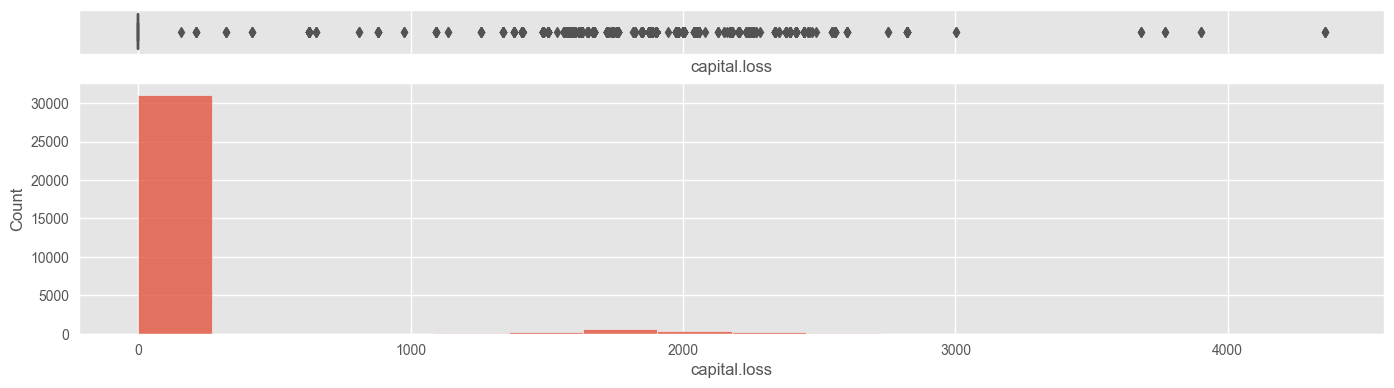

_____ hours.per.week ____________________________________________________________________________________________________ 




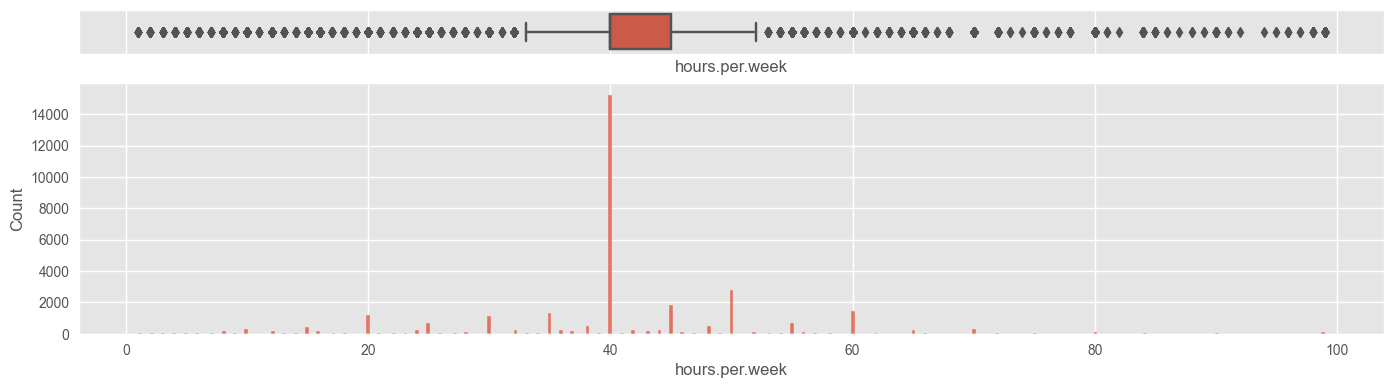

In [65]:
# - numeric features nên sử dụng những loại biểu đồ như: histogram (hình dạng phân phối), boxplot (phạm vi phân bố của dữ liệu).

numeric = set(dataset.columns) - set(categorical)

for i in numeric:
    plt.style.use('ggplot')
    print('_' * 5, i, '_' * 100, '\n' * 2)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (.15, .85)})
    f.set_figheight(4)
    f.set_figwidth(15)
    sns.boxplot(x = dataset[i], ax = ax_box)
    sns.histplot(data = dataset, x = i, ax = ax_hist)
    plt.show()

_____ capital.gain ____________________________________________________________________________________________________ 




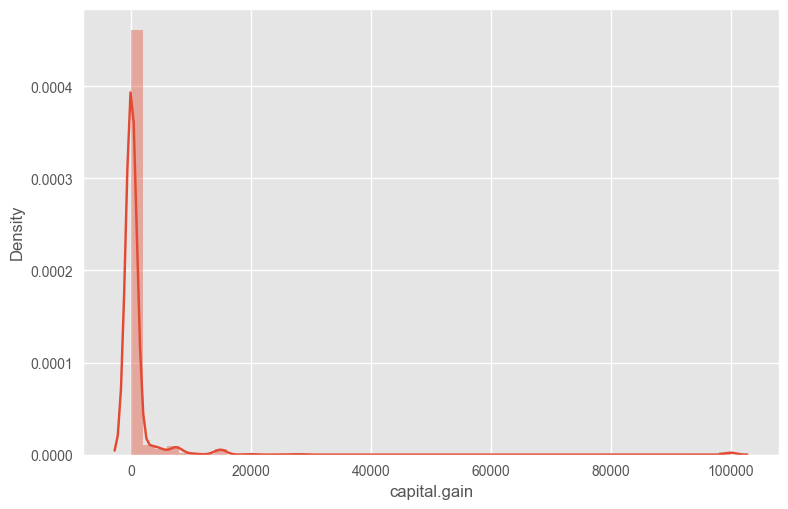

_____ education.num ____________________________________________________________________________________________________ 




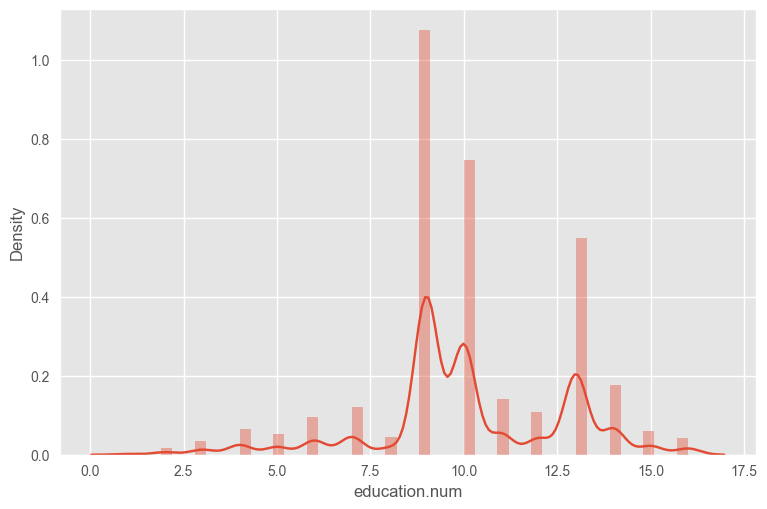

_____ fnlwgt ____________________________________________________________________________________________________ 




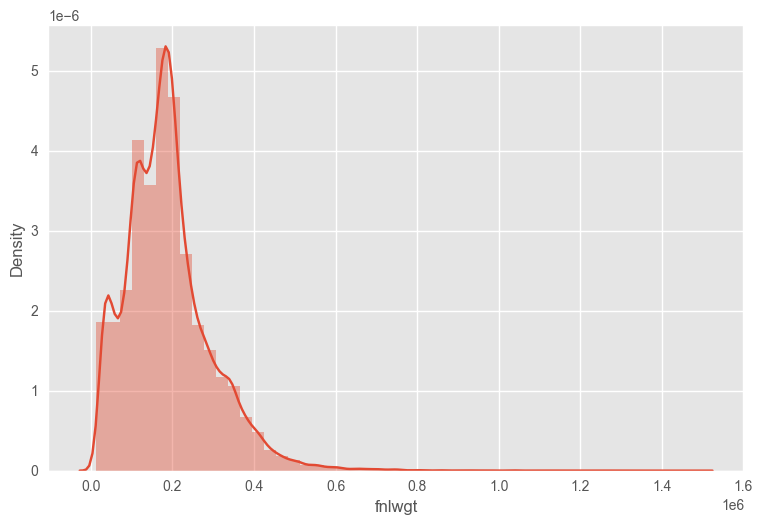

_____ age ____________________________________________________________________________________________________ 




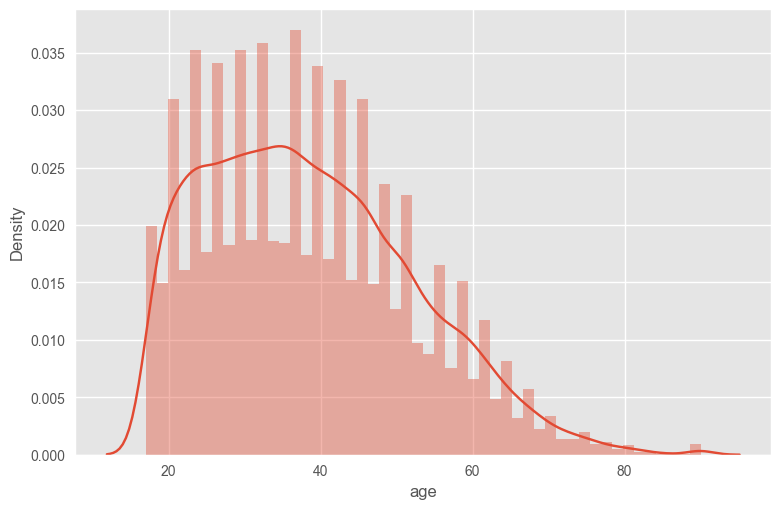

_____ capital.loss ____________________________________________________________________________________________________ 




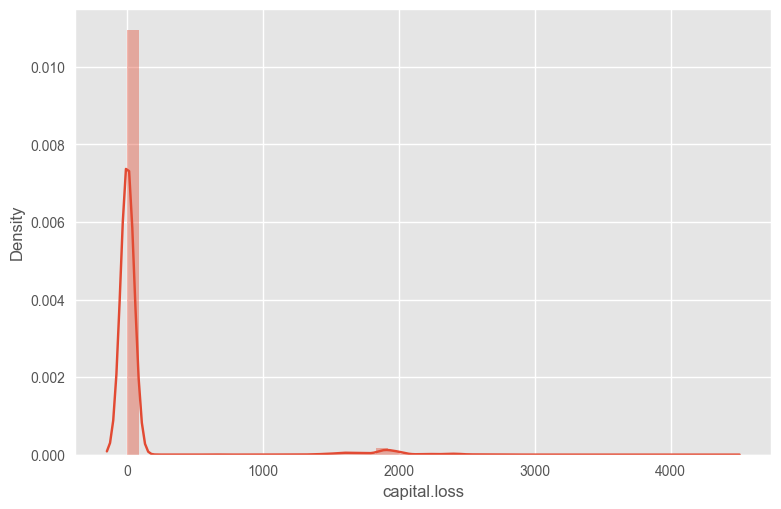

_____ hours.per.week ____________________________________________________________________________________________________ 




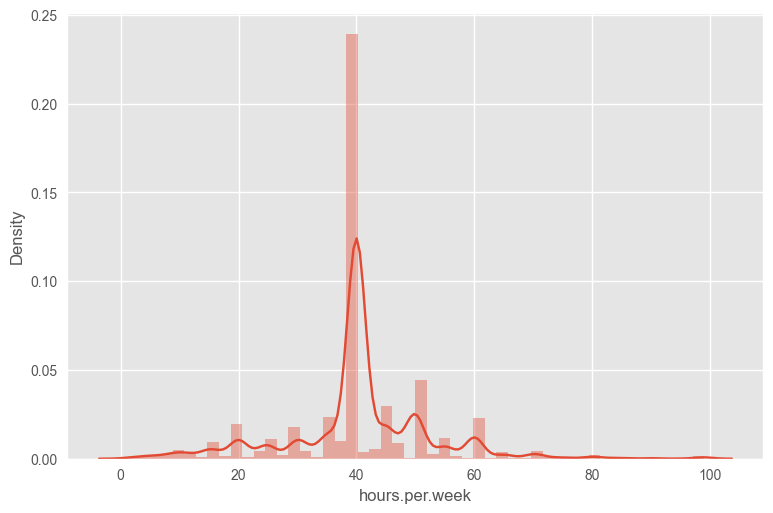

In [68]:
for i in numeric:
    plt.style.use('ggplot')
    print('_' * 5, i, '_' * 100, '\n' * 2)
    sns.distplot(dataset[i])
    plt.show()

### Phân tích 2 biến

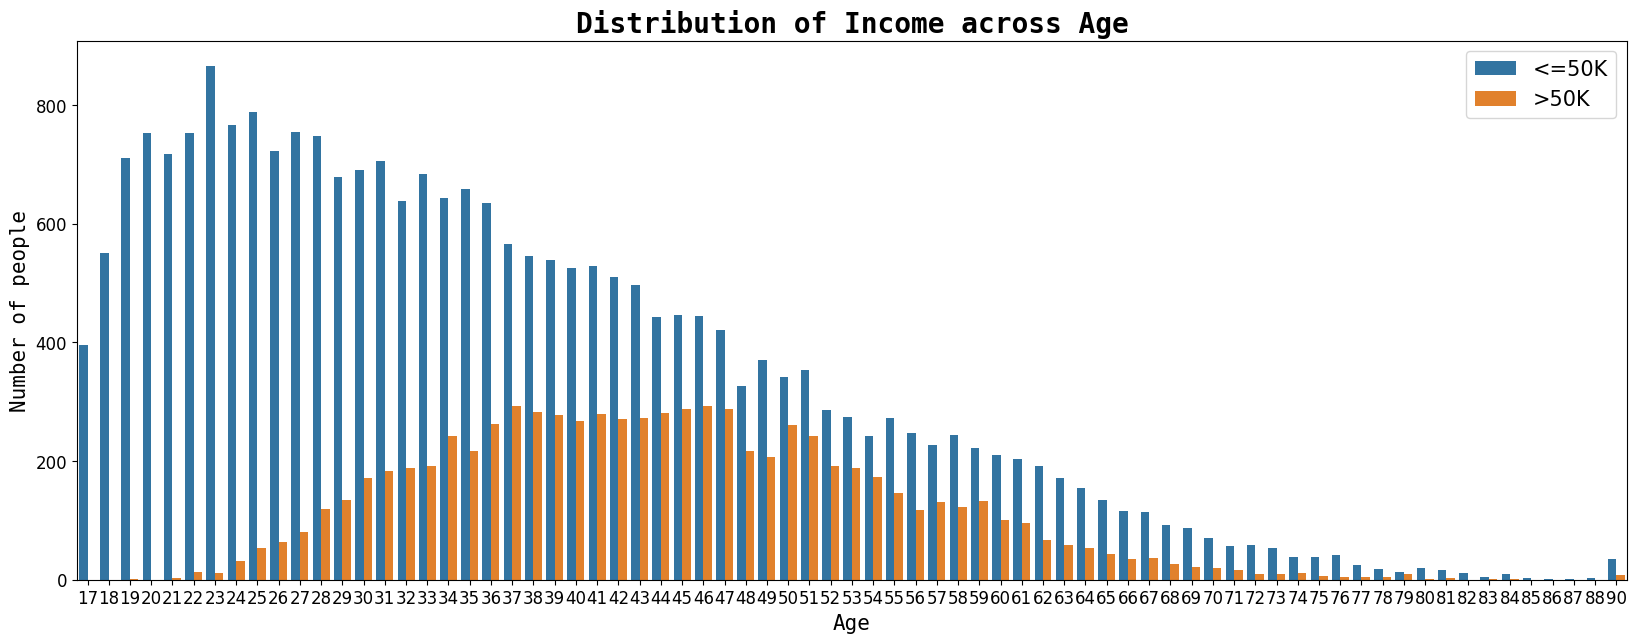

In [9]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['age'], hue=dataset['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

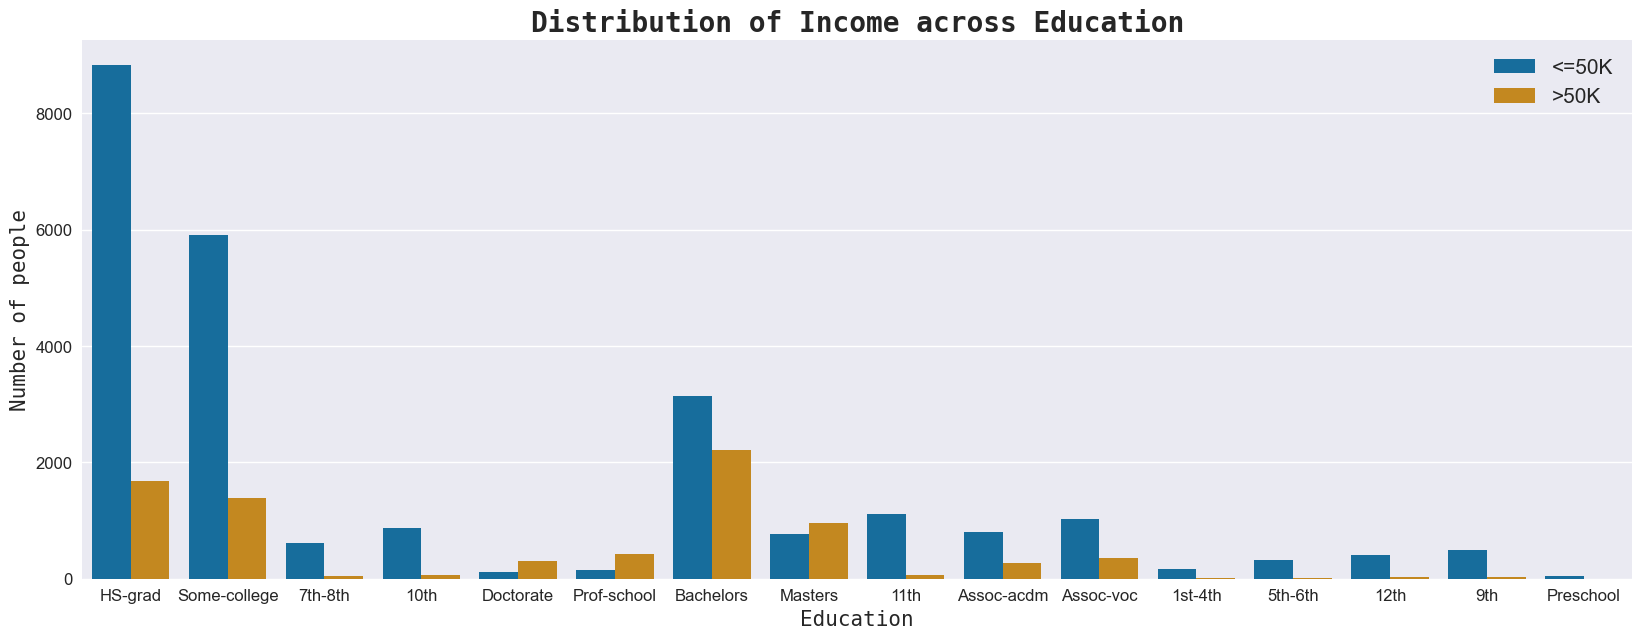

In [10]:
# Tạo biểu đồ countplot cho 'income' từ 'education'

plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['education'],
              hue=dataset['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

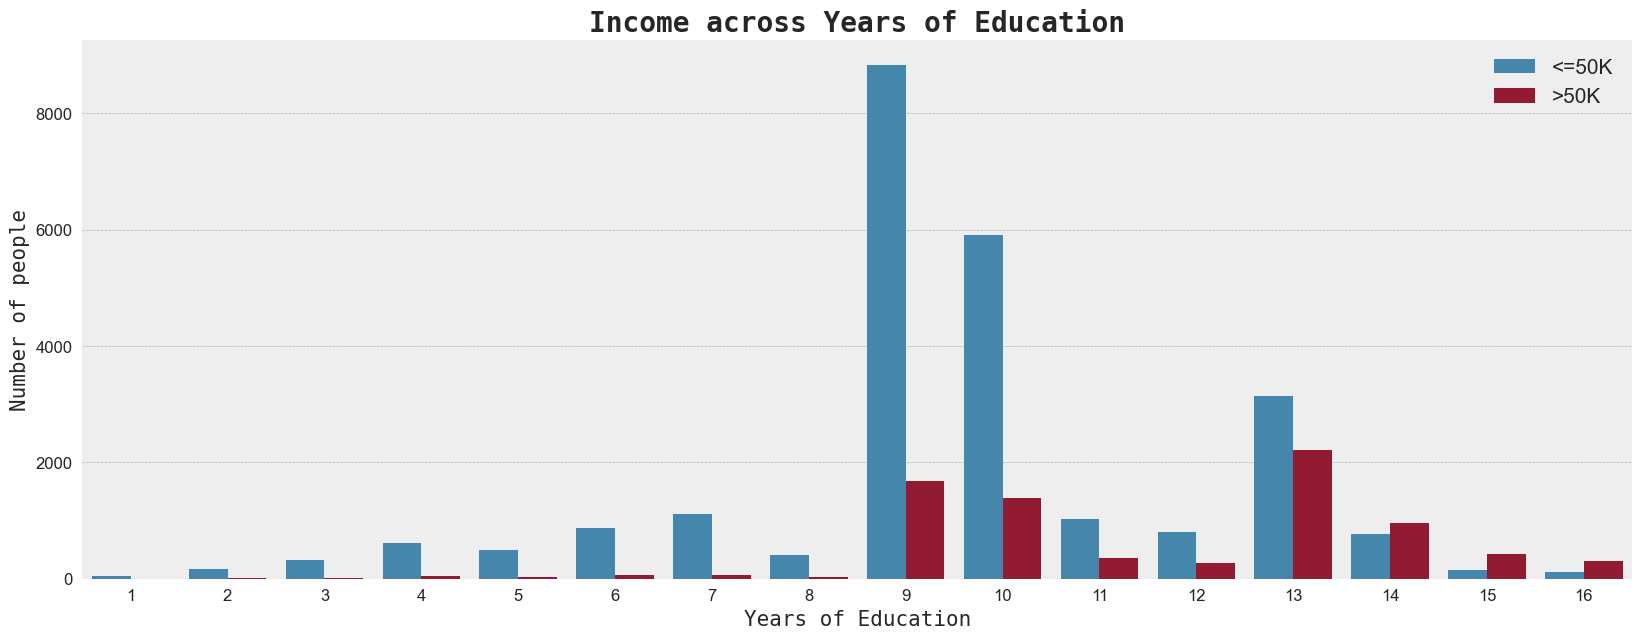

In [11]:
# Tạo biểu đồ countplot cho 'income' từ 'years of education'

plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['education.num'],
              hue=dataset['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

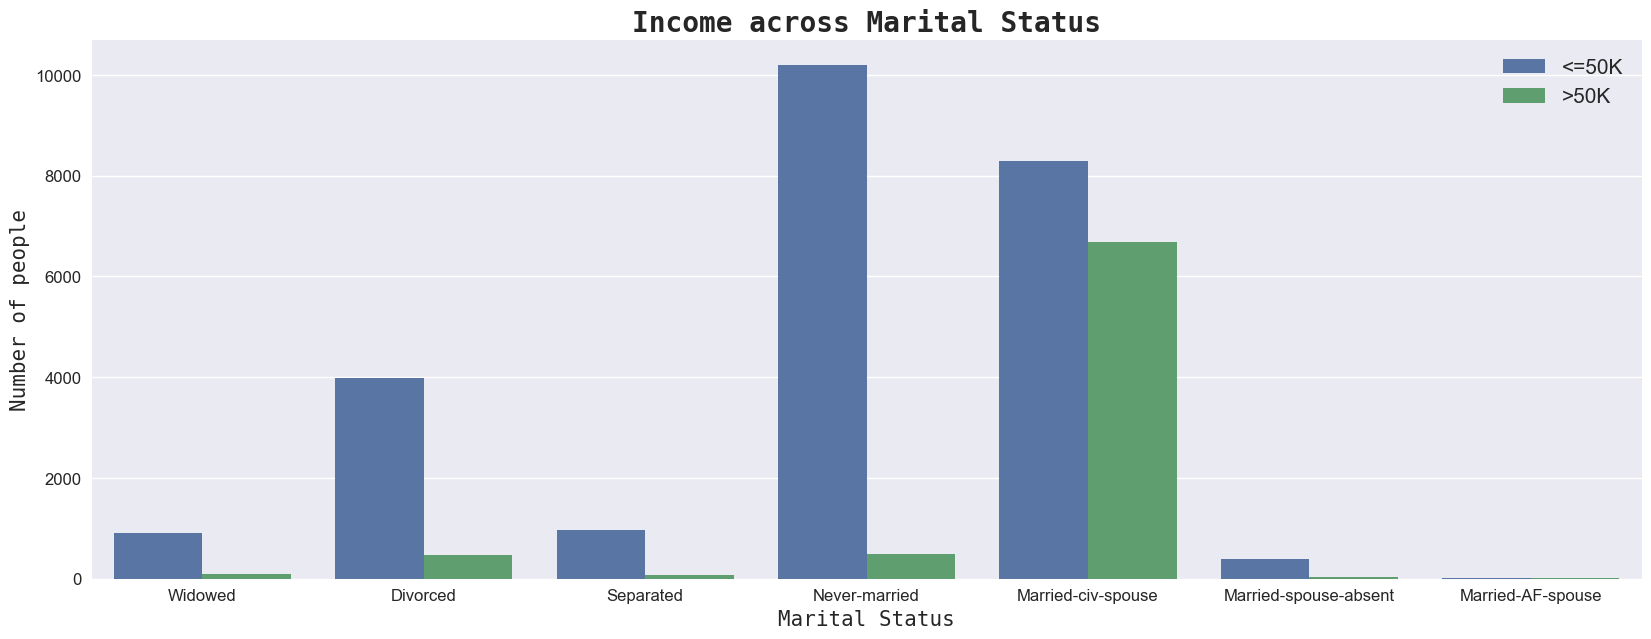

In [12]:
# Tạo biểu đồ countplot cho 'income' từ 'Marital Status'

plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['marital.status'], hue=dataset['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

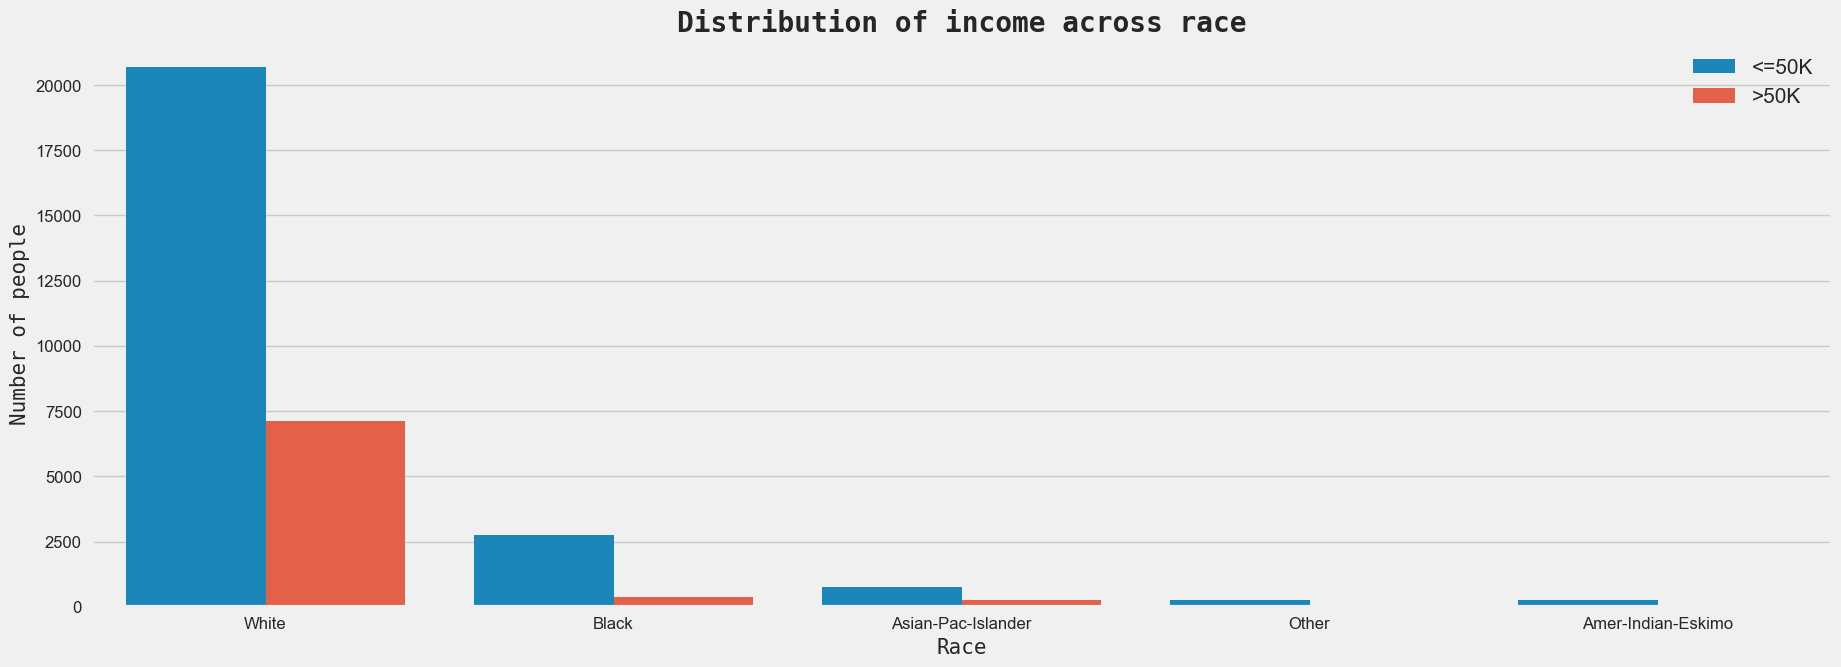

In [13]:
# Tạo biểu đồ countplot cho 'income' từ 'race'
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x = dataset['race'], hue=dataset['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

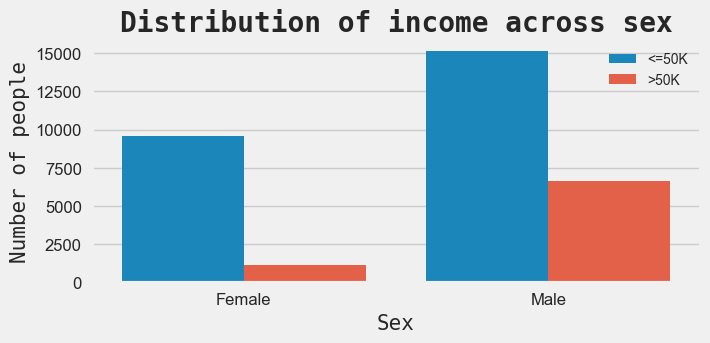

In [14]:
# Tạo biểu đồ countplot cho 'income' từ 'sex'

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x = dataset['sex'], hue=dataset['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})

plt.show()

### Phân tích đa biến

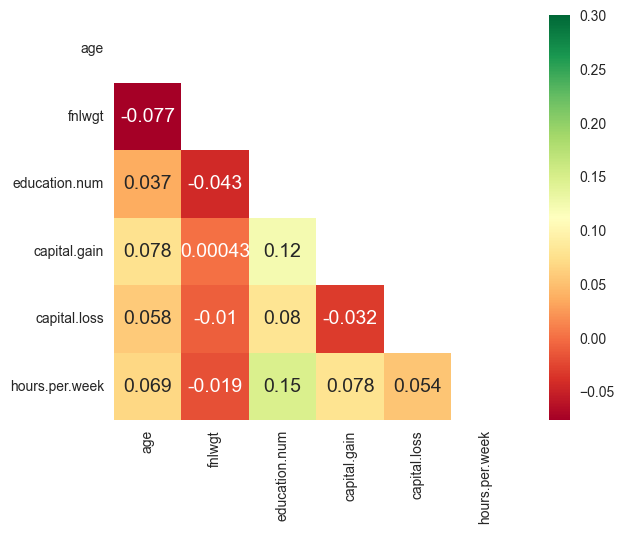

In [15]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')

plt.show()

===> Trong tập dữ liệu này, hầu hết mọi người là 'thanh niên', 'da trắng', 'nam', tốt nghiệp trung học với trình độ học vấn từ 9 đến 10 năm và làm việc 40 giờ mỗi tuần.

===> Từ biểu đồ heatmap, có thể thấy rằng trường 'income' có mối tương quan cao với 'age', 'numbers of years of education','capotal' và 'hours per week'.

### 3,Tiền xử lý dữ liệu

In [16]:
# kiểm tra giá trị khuyết thiếu

round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

===> Tuy không có giá trị khuyết thiếu nhưng trong quá trình phân tích ta thấy có giá trị ("?") xuất hiện rất nhiều.

In [17]:
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

===> Chiếm tỉ lệ khá lớn trong bộ dữ liệu

In [18]:
# xử lý giá trị ('?')
# Thay chúng bằng giá trị Nan
dataset = dataset.replace('?', np.nan)

columns_with_nan = ['workclass', 'occupation', 'native.country']

In [19]:
# điền những giá trị Nan ấy bằng phương pháp mode imputation 
for i in columns_with_nan:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

In [20]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int32
 14  income          32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [22]:
# phân vùng dữ liệu

X = dataset.drop('income', axis=1)
Y = dataset['income']

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [24]:
feature_imp = selector.feature_importances_

for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [25]:
# Bỏ những trường có mức độ quan trọng thấp
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   marital.status  32561 non-null  int32
 4   occupation      32561 non-null  int32
 5   relationship    32561 non-null  int32
 6   capital.gain    32561 non-null  int64
 7   hours.per.week  32561 non-null  int64
dtypes: int32(3), int64(5)
memory usage: 1.6 MB


In [27]:
# Chuẩn hóa dữ liệu

from sklearn.preprocessing import StandardScaler

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))
    
X

,age,fnlwgt,education.num,marital.status,occupation,relationship,capital.gain,hours.per.week
0,3.769612,-1.067997,-0.420060,2.249480,0.720237,-0.277805,-0.14592,-0.035429
1,3.183112,-0.539169,-0.420060,2.249480,-0.790092,-0.277805,-0.14592,-1.817204
2,2.010110,-0.035220,-0.031360,2.249480,0.720237,1.589322,-0.14592,-0.035429
3,1.130359,-0.468215,-2.363558,-1.734058,-0.034928,1.589322,-0.14592,-0.035429
4,0.177296,0.709482,-0.031360,1.585557,0.720237,0.966947,-0.14592,-0.035429
...,...,...,...,...,...,...,...,...
32556,-1.215643,1.140460,-0.031360,0.921634,0.971958,-0.277805,-0.14592,-0.035429
32557,-0.849080,0.639741,0.746039,-0.406212,1.475401,2.211698,-0.14592,-0.197409
32558,0.103983,-0.335433,-0.420060,-0.406212,-0.034928,-0.900181,-0.14592,-0.035429
32559,1.423610,-0.358777,-0.420060,2.249480,-1.545256,1.589322,-0.14592,-0.035429


In [28]:
# Sửa tập dữ liệu mất cân bằng bằng cách sử dụng Oversampling

round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [30]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

In [31]:
# Chia tập train và test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [32]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


### 4, Xây dựng mô hình

In [33]:
# Logictic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, Y_train)

Y_pred_log_reg = log_reg.predict(X_test)

In [34]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

Y_pred_knn = knn.predict(X_test)

In [35]:
# Support Vector Classifier

from sklearn.svm import SVC
svc = SVC(random_state=42)

svc.fit(X_train, Y_train)

Y_pred_svc = svc.predict(X_test)

In [36]:
# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, Y_train)

Y_pred_nb = nb.predict(X_test)

In [37]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

dec_tree.fit(X_train, Y_train)

Y_pred_dec_tree = dec_tree.predict(X_test)

In [38]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

ran_for.fit(X_train, Y_train)

Y_pred_ran_for = ran_for.predict(X_test)

In [39]:
# XGB Classifier

from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train, Y_train)

Y_pred_xgb = xgb.predict(X_test)

### 5, Đánh giá mô hình

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [41]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.25
F1 score: 75.08


In [42]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.42
F1 score: 84.43


In [43]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.58
F1 score: 82.56


In [44]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 64.68
F1 score: 48.42


In [45]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.61
F1 score: 92.01


In [46]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.6
F1 score: 92.93


In [47]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 86.09
F1 score: 86.57


### 6, Điều chỉnh tham số

In [48]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

rf_tuned = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [49]:
rf_cv.best_score_

0.9131271105332539

In [50]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 102}

In [51]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [52]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [53]:
Y_pred_rf_best = rf_best.predict(X_test)

In [54]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.77
F1 score: 93.08


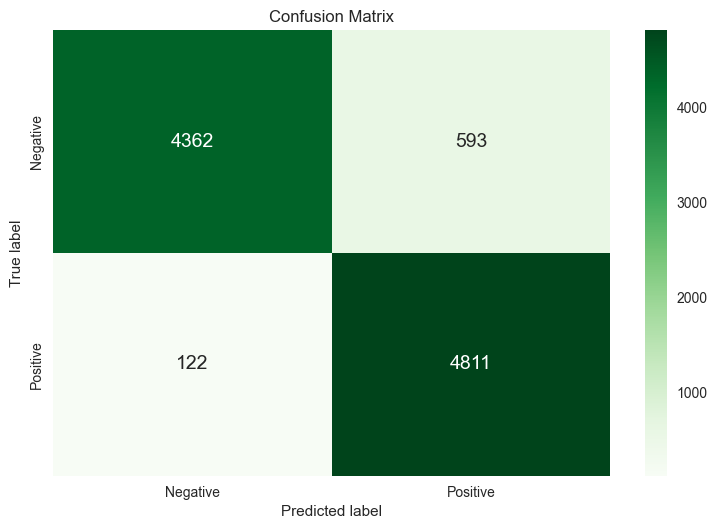

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

plt.style.use('seaborn')
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')


plt.show()

### 7, Lưu mô hình 

In [58]:
# Sử dụng Joblib

from joblib import dump

# Lưu mô hình
dump(cm, 'model.joblib')

['model.joblib']